In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data:

In [275]:
df = pd.read_csv('assets/movie_data_a.csv')
df.head()

,Title,Year,Runtime,RT_Score,Genre,Subgenre,Rating,Director,Theatres
0,2012,2009,2.38.00,0.39,Action,Sci-fi,PG-13,Roland Emmerich,False
1,!Airplane,1980,1.28.00,0.97,Comedy,Romance,PG,"David Zucker, Jerry Zucker, Jim Abrahams",False
2,#Alive,2020,1.39.00,0.88,Thriller,Drama,NR,Il Cho,False
3,10 Cloverfield Lane,2016,1.45.00,0.90,Sci-Fi,Thriller,PG-13,Dan Trachtenberg,True
4,101 Dalmatians,1996,1.43.00,0.41,Adventure,Comedy,G,Stephen Herek,False


Find out meta information about the data, such as dtypes, number of entries, etc.:

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     959 non-null    object 
 1   Year      959 non-null    int64  
 2   Runtime   959 non-null    object 
 3   RT_Score  954 non-null    float64
 4   Genre     959 non-null    object 
 5   Subgenre  914 non-null    object 
 6   Rating    959 non-null    object 
 7   Director  959 non-null    object 
 8   Theatres  959 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 61.0+ KB


Detect null values:

In [277]:
pd.isnull(df).head()
df[pd.isnull(df).any(axis=1)]

,Title,Year,Runtime,RT_Score,Genre,Subgenre,Rating,Director,Theatres
10,1920 London,2016,2.00.00,NaN,Horror,Mystery,NR,Tinu Suresh Desai,False
37,Akeelah and the Bee,2006,1.52.00,0.85,Drama,NaN,PG,Doug Atchinson,False
43,Alien Resurrection,1997,1.56.00,0.53,Sci-Fi,NaN,R,Jean-Pierre Jeunet,False
48,All About Steve,2009,1.39.00,0.06,Comedy,NaN,PG-13,Phil Traill,False
63,Anne of Green Gables,1985,3.19.00,1.00,Drama,NaN,G,Kevin Sullivan,False
83,Babar: The Movie,1989,1.19.00,0.73,Adventure,NaN,G,Alan Bunce,False
90,Barbie Birthday Party at Walt Disney World Epc...,1994,00.30.00,NaN,Short,NaN,G,Susan Kosar Beery,False
116,Blood Glacier,2013,1.38.00,0.45,Horror,NaN,NR,Marvin Kren,False
130,Bringing Out the Dead,1999,2.01.00,0.73,Drama,NaN,R,Martin Scorsese,False
149,Chariots of Fire,1981,2.03.00,0.83,Drama,NaN,PG,Hugh Hudson,False


Identify number of null values in 'Subgenre' and 'RT_Score' columns:

In [278]:
len(df[pd.isnull(df.Subgenre)]) 
# Output: 45
len(df[pd.isnull(df.RT_Score)])
# Output: 5

5

Create a copy of the dataframe, and replace null values. In 'RT_Score' column, values are replaced with the mean of the column total, and in the 'Subgenre' column, values are replaced with 'No Genre'

In [279]:
df1 = df.copy()

df1['RT_Score'] = df1['RT_Score'].fillna((df1['RT_Score'].mean()))
df1['Subgenre'].fillna('No Genre', inplace = True)

View some basic statistical details like percentile, mean, standard deviation, etc.
Here we can see that the least recent release year was 1902, the most recent was 2022; the average Rotten Tomatoes score is about 68%, and the average runtime is approximately 2 hours. 

In [280]:
df1.describe()

,Year,RT_Score
count,959.000000,959.000000
mean,1997.821689,0.676394
std,20.426060,0.241106
min,1902.000000,0.010000
25%,1993.000000,0.500000
50%,2004.000000,0.730000
75%,2011.500000,0.880000
max,2022.000000,1.000000


"Runtime" column had an extra decimal place marking seconds, but I removed this so that I could convert the column to a float and do some basic calculations on it.

In [281]:
df1['Runtime'] = df1['Runtime'].astype(str).replace('\.00', '', regex=True)
df1['Runtime'] = df1.Runtime.astype(float)

df1['Runtime'].mean()
# Output: 1.5934827945776853. Average movie length is just shy of two hours!
df1['Runtime'].sum()
# Output: 1528.15. (1,528 hours) That's over 60 days of round-the-clock movie-watching!

1528.15

Count the unique entries.
It may be useful to know exactly how many unique values are in each column. For example, we can see that there are 91 different release years, 24 genres, 47 subgenres and over 600 different directors (or groups of directors).
It also looks like some movies have the same names, since there are 959 entries, but only 940 unique values for Title.

In [282]:
df1.nunique()

Title       940
Year         91
Runtime     118
RT_Score     98
Genre        24
Subgenre     47
Rating        6
Director    665
Theatres      2
dtype: int64

Mode() tells us the most frequently occurring instance of something. I was curious what genre and director I have watched most, and in what year the most movies I watched were released.

In [283]:
df1['Genre'].mode()
# Output: Comedy
df1['Director'].mode()
# Output: received more than one result - Barry Sonnenfield, Sam Raimi, Steven Spielberg, and Tim Burton.
df1['Year'].mode()
# Output: 2004


0    2004
Name: Year, dtype: int64

The average Rotten Tomatoes score of all movies I've watched is 68% (rounded up). This is across all genres, decades, and directors. What might be the best predictor of which movies I choose to watch?

In [284]:
df1['RT_Score'].mean()
# Output: 0.6763941299790357

0.6763941299790357

Correlation:

The number varies from -1 to 1.
1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will. (W3Schools)

There's almost no correlation between the movie's release year, its Rotten Tomatoes score, and whether or not I watched it in theaters!

In [285]:
df1.corr()

C:\Users\isabe\AppData\Local\Temp\ipykernel_6904\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Year,Runtime,RT_Score,Theatres
Year,1.000000,0.097348,-0.260784,0.203879
Runtime,0.097348,1.000000,0.139988,0.071198
RT_Score,-0.260784,0.139988,1.000000,0.074588
Theatres,0.203879,0.071198,0.074588,1.000000


This plot shows the relationship between the genre of movies in the dataframe and the year they were released. You can see the genres I've watched most frequently, as well as the time period of movie releases I tend to watch. As you can see, Musicals and Comedies tend to populate the plot in every decade, while genres like Horror, Action, and SciFi are clustered toward the latter half of the plot.

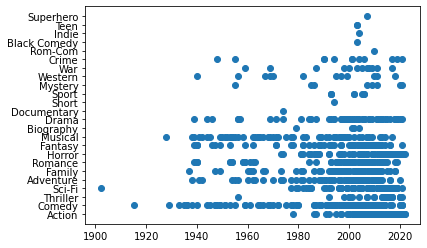

In [286]:
x = df['Year']
y = df['Genre']
plt.scatter(x, y)
plt.show()

Similar to the above plot, this shows the score as reported by Rotten Tomatoes for each movie I've watched, by genre. I wondered if there was a correlation between the genre and how high or low the movie tended to be rated, but with a few exceptions I appear to watch movies of all genres regardless of how well they were received. My favorite genre (not necessarily most frequently watched), Horror, obviously has scores all over the spectrum, though it does cluster somewhat towards the higher end.

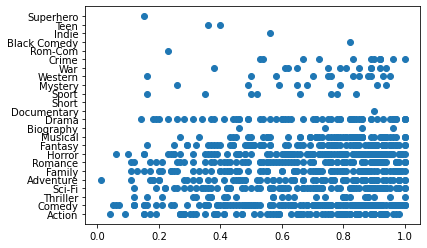

In [287]:
x = df['RT_Score']
y = df['Genre']
plt.scatter(x, y)
plt.show()

This histogram plots the release dates of the movies I've watched. I tend to most frequently watch movies released 2000 to 2010, so there will be more data about these films.

<AxesSubplot: ylabel='Frequency'>

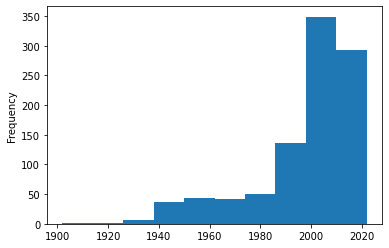

In [288]:
df1['Year'].plot(kind = 'hist')

After cleaning and doing some basic calculations on the data, I am going to use a section of it to train a decision tree which will predict whether or not I will watch a movie when it is released in theaters, based on my past viewing history.

In [289]:
def convert_column_to_numerical(column_name):
    # set values to lowercase for uniformity/consistency
    df1[column_name] = df1[column_name].str.lower()
    # create a set which contains only the unique values in the given column
    my_set = set(df1[column_name])
    # convert the set into a list
    my_list = list(my_set)
    # enumerate over the list to obtain the key and value pairs
    y = enumerate(my_list)
    print(list(y))

In [290]:
convert_column_to_numerical('Genre')

[(0, 'biography'), (1, 'drama'), (2, 'adventure'), (3, 'sport'), (4, 'horror'), (5, 'documentary'), (6, 'mystery'), (7, 'thriller'), (8, 'comedy'), (9, 'black comedy'), (10, 'teen'), (11, 'western'), (12, 'short'), (13, 'indie'), (14, 'fantasy'), (15, 'sci-fi'), (16, 'crime'), (17, 'musical'), (18, 'superhero'), (19, 'romance'), (20, 'action'), (21, 'rom-com'), (22, 'war'), (23, 'family')]


In [291]:
# convert Title to numeric by taking the len() of each string. "Alien" would be 5, "Babe" would be 4, "Zoolander" would be 9, and so on.
df1.Title = df1.Title.apply(str).apply(len)
df1

,Title,Year,Runtime,RT_Score,Genre,Subgenre,Rating,Director,Theatres
0,4,2009,2.38,0.39,action,Sci-fi,PG-13,Roland Emmerich,False
1,9,1980,1.28,0.97,comedy,Romance,PG,"David Zucker, Jerry Zucker, Jim Abrahams",False
2,6,2020,1.39,0.88,thriller,Drama,NR,Il Cho,False
3,19,2016,1.45,0.90,sci-fi,Thriller,PG-13,Dan Trachtenberg,True
4,14,1996,1.43,0.41,adventure,Comedy,G,Stephen Herek,False
...,...,...,...,...,...,...,...,...,...
954,13,1941,2.12,0.78,musical,Romance,NR,Robert Z. Leonard,False
955,6,2007,2.37,0.90,thriller,Mystery,R,David Fincher,False
956,10,2009,1.21,0.89,horror,Comedy,R,Ruben Flesicher,False
957,9,2001,1.29,0.64,comedy,No Genre,PG-13,Ben Stiller,False
